## ¿Qué es _Machine Learning (ML)_?

**Primero** realizamos experimentos (ciencia), **después** desarrollamos productos (ingeniería)

Dos roles $\rightarrow$ dos flujos de trabajo:

- **diseñador** de algoritmos de ML $\rightarrow$ se enfoca en cómo se **genera un modelo**.
- **usuario** de algoritmos de ML $\rightarrow$ se enfoca que **calibrar modelos** respecto a unos datos concretos.


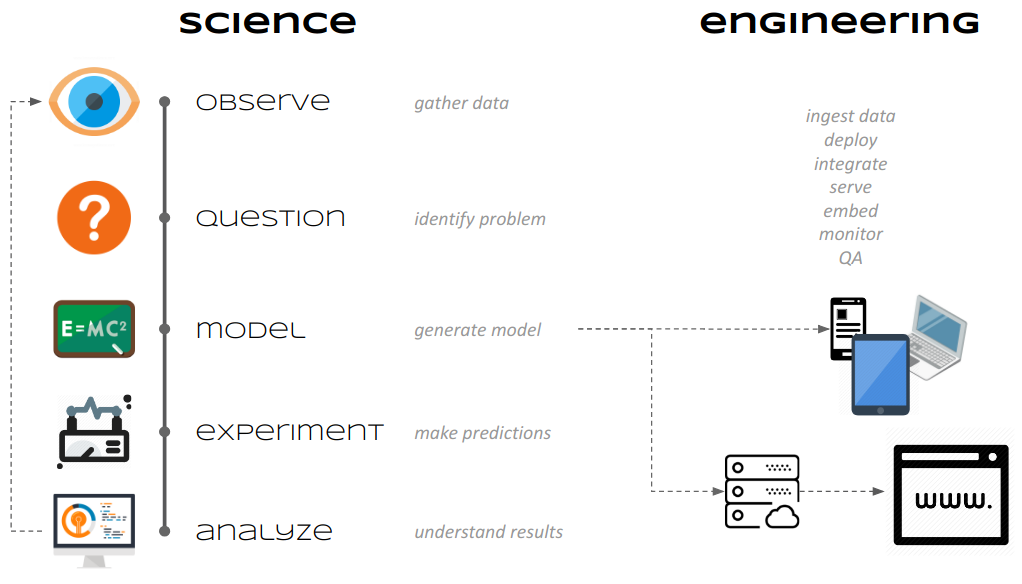

In [1]:
from IPython.display import Image
Image(filename='imgs/science_engineering.png', width=600)

Los modelos inducidos por los datos son generados por **algoritmos de ML**

`sklearn` ofrece herramientas para soportar la mayor parte del flujo de trabajo de un **usuario ML** (pero no _empaqueta_ un modelo para llevarlo a un entorno de producción)

`tensorflow` se originó como una herramienta para **diseñadores** de algoritmos ML, y va incluyendo gradualmente elementos para soportar a **usuarios ML**.

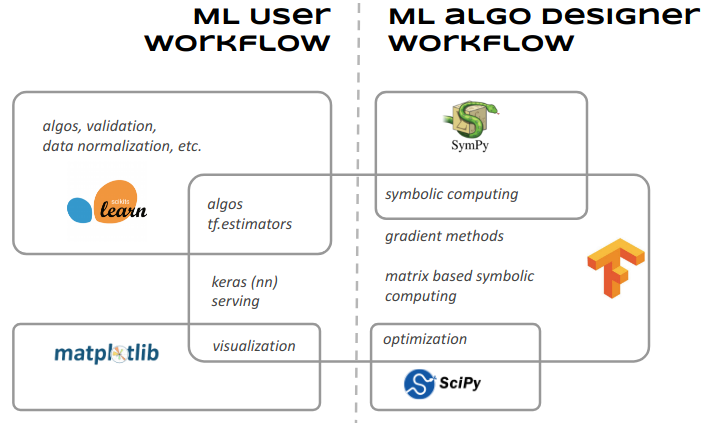

In [5]:
Image(filename='imgs/ml_workflows_tools.png', width=600)

we will first focus on understanding the **ML User Workflow**. As this is a TF course, we will use TF as much as possible, although we will resort to sklearn when:

- things are not available in TF
- things in sklearn are easier or more efficient to use

# ¿Qué es un modelo derivado de los datos?

- en 2D, un modelo de clasificación **es una frontera** en el plano

- **supongamos** que tenemos acceso a las distribuciones de las que surgen los datos $\rightarrow$ podemos muestrear tantas veces como queramos

- ¿cuál es la frontera que produce menos error de clasificación?

- $\epsilon$ es el error de clasificación calculado analíticamente **con la frontera óptima** porque conocemos las distribuciones que generan los datos.
- $\hat{\epsilon}$ es el error de clasificacón calculado con la muestra de datos y **con la frontera óptima** (conocida también como _frontera bayesiana_).

In [1]:
import mlutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/opt/miniconda/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


/opt/miniconda/lib/python2.7/site-packages/scipy/stats/_multivariate.py:652: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


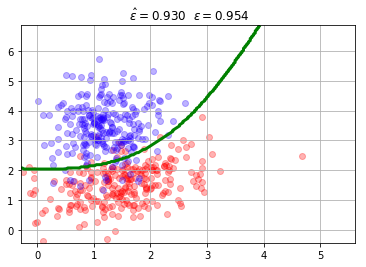

In [2]:
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 1.5], cov0=[[0.5, 0.1], [0.3, 0.5]],
                                        mean1=[1.2, 3.5], cov1=[[0.2,0.1],[0,.5]])
X,y = mc.sample(500)
mlutils.plot_2Ddata_with_boundary(mc.predict, X, y, line_width=3, line_color="green", dots_alpha=.3)
plt.title(" $\hat{\epsilon}=%.3f$"%mc.score(X,y)+"  $\epsilon=%.3f$"%mc.analytic_score());
plt.grid();

haz los siguientes experimentos:

- separa los centros de las distribuciones de cada clase (`mean0`, `mean1`).
- aumenta y disminuye las matrices de covarianza.
- aumenta y disminuye el número de muestras.


- observa la estabilidad de $\hat{\epsilon}$ respecto a $\epsilon$ según ambas clases están más mezcladas o hay más o menos datos.

en general **SOLO TENEMOS UNA MUESTRA** de los datos, porque no tenemos conocimiento de las distribuciones que los generan. Los métodos de **estadística** y de **machine learning** están diseñados para esta situación.

Ejecuta la siguiente celda y pregúntate cada vez, **¿qué frontera establecerías con los datos que ves?**.

Fíjate que tenemos distintas muestras de una misma disitribución de base. Es decir, **la realidad detrás de estos datos siempre es la misma**.

**Aumenta** el número de muestras y hazte cada vez la misma pregunta.

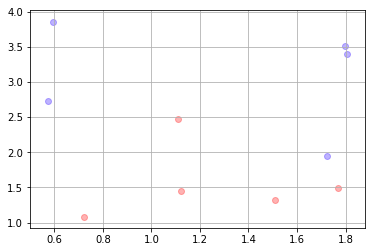

In [3]:
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 1.5], cov0=[[0.5, 0.1], [0.3, 0.5]],
                                        mean1=[1.2, 3.], cov1=[[0.2,0.1],[0,.5]])
X,y = mc.sample(10)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
plt.grid()

### Los algoritmos de machine learning:

- Los algoritmos de clasificación **calculan fronteras** entre los datos.
- Parten de una muestra de los datos, **no de las distribuciones**.
- Por tanto, **no conocemos** la forma de la frontera bayesiana.

O sea, **partimos ciegos**!!!!!!!

Para abordar esta situación, **cualquier algoritmo** tiene necesariamente que plantear una alguna suposición de base:

- los datos vienen de distribuciones normales.
- las columnas son estadísticamente independientes.
- la frontera es lineal, o cuadrática.
- la frontera se representa con una red neuronal.

Teniendo esto en cuenta, y **partiendo de una muestra de los datos**:

- el objetivo de un usuario de ML es acercarse lo más posible a la **frontera bayesiana** (que no sabemos cómo es).
- distintos algoritmos ML tienen **distintas capacidades** para modelar fronteras (un clasificador lineal no puede captuarar una frontera cuadrática).
- necesitamos dos tipos de herramientas:
   - una buena colección de algoritmos ML.
   - métodos para saber qué tan cerca estamos de la frontera bayesiana.

## Bayes error

- if we knew the distributions generating our data the Bayes Classifier would give the lowest possible generalization error
- refs [[bayes KNN](http://www.cs.cmu.edu/~epxing/Class/10701-10s/Lecture/lecture3.pdf)], [[no free lunch](http://www.santafe.edu/media/workingpapers/12-10-017.pdf)]

In [4]:
%run -i mlutils.py
%matplotlib inline


## Bayes classifier frontiers

Bayes classification frontier shown. Try values of $n$ such as 5, 10, 20, 100, 200, 500 and compare empirical error $\hat{\epsilon}$ with analytical Bayes error $\epsilon$

Text(0.5,1,'DISTRIB 3 $\\hat{\\epsilon}=0.732$  $\\epsilon=0.747$')

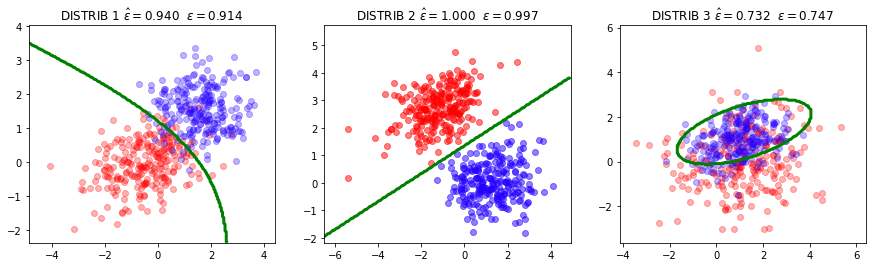

In [5]:
n=500

plt.figure(figsize=(15,4))
plt.subplot(131)
mc1 = Example_Bayes2DClassifier(mean0=[-0.5, 0], cov0=[[1.2, 0.3], [0.3, 0.5]],
                              mean1=[1.5,1.5], cov1=[[.7,0],[0,.5]])
X,y = mc1.sample(n)
plot_2Ddata_with_boundary(mc1.predict, X, y, line_width=3, line_color="green", dots_alpha=.3)
plt.title("DISTRIB 1 $\hat{\epsilon}=%.3f$"%mc1.score(X,y)+"  $\epsilon=%.3f$"%mc1.analytic_score())
plt.subplot(132)
mc2 = Example_Bayes2DClassifier(mean0=[-1.2, 2.7], cov0=[[1.2, 0.3], [0.3, 0.5]],
                               mean1=[ 1.2, 0], cov1=[[1.2,0],[0.3,.5]])
X,y = mc2.sample(n)
plot_2Ddata_with_boundary(mc2.predict, X, y, line_width=3, line_color="green",)
plt.title("DISTRIB 2 $\hat{\epsilon}=%.3f$"%mc2.score(X,y)+"  $\epsilon=%.3f$"%mc2.analytic_score())


plt.subplot(133)
mc3 = Example_Bayes2DClassifier(mean0=[1.0, 0], cov0=[[2, 0.3], [0.3, 2]],
                              mean1=[1.0,1.0], cov1=[[1.2, 0.3], [0.3, 0.5]])
X,y = mc3.sample(n)
plot_2Ddata_with_boundary(mc3.predict, X, y, line_width=3, line_color="green", dots_alpha=.3)
plt.title("DISTRIB 3 $\hat{\epsilon}=%.3f$"%mc3.score(X,y)+"  $\epsilon=%.3f$"%mc3.analytic_score())


## Exploring classification frontiers from KNeighbors

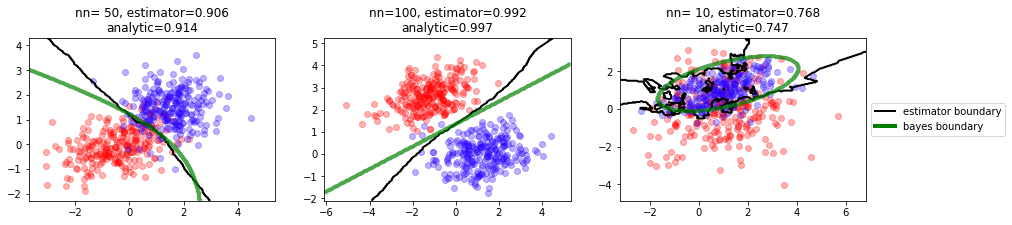

In [6]:
estimators = {"nn=%3d"%i: KNeighborsClassifier(i) for i in [10,50,100,200]}
plt.figure(figsize=(15,3))
for i,mc in enumerate([mc1, mc2, mc3]):
    plt.subplot(1,3,i+1)
    plot_estimator_border(mc, estimators.values()[i], estimator_name=estimators.keys()[i], n_samples=500, legend=i==2)

100% (4 of 4) |###########################| Elapsed Time: 0:00:10 Time: 0:00:10
100% (4 of 4) |###########################| Elapsed Time: 0:00:10 Time: 0:00:10
100% (4 of 4) |###########################| Elapsed Time: 0:00:10 Time: 0:00:10


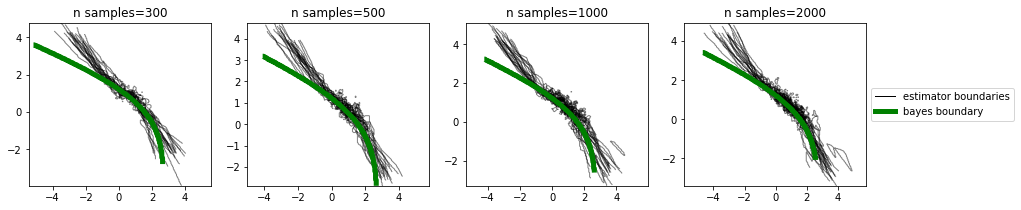

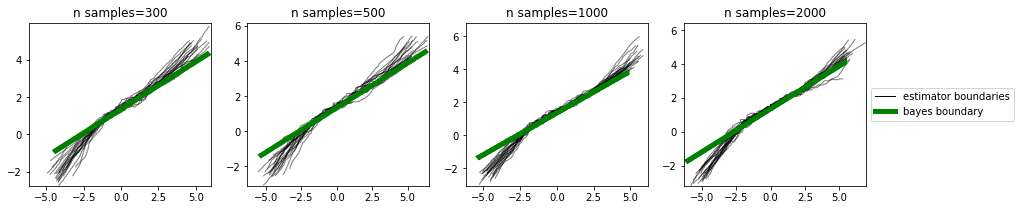

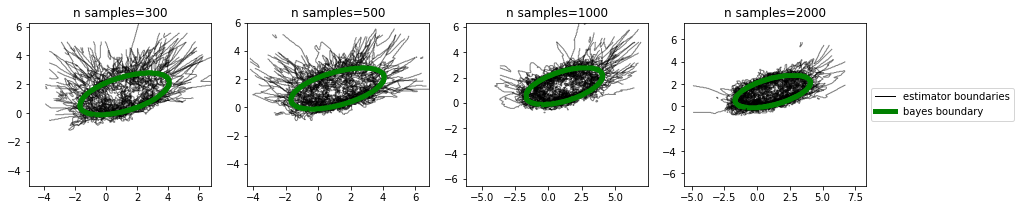

In [7]:
for mc in [mc1, mc2, mc3]:
    sample_borders(mc, KNeighborsClassifier(10), samples = [300,500,1000,2000], n_reps=20)

100% (4 of 4) |###########################| Elapsed Time: 0:01:07 Time: 0:01:07
100% (4 of 4) |###########################| Elapsed Time: 0:01:07 Time: 0:01:07
100% (4 of 4) |###########################| Elapsed Time: 0:01:07 Time: 0:01:07


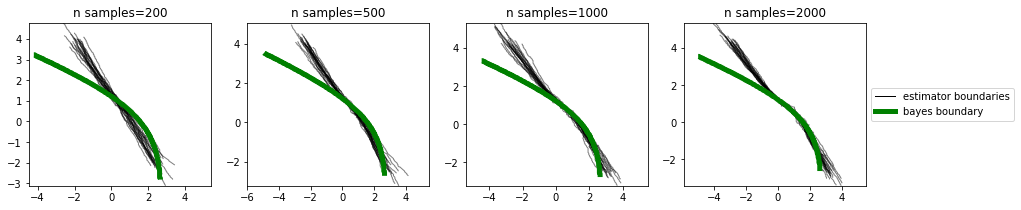

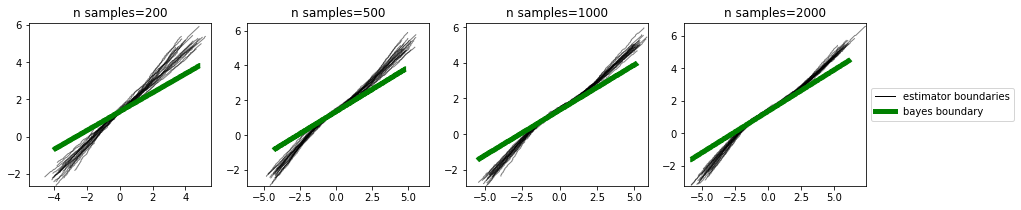

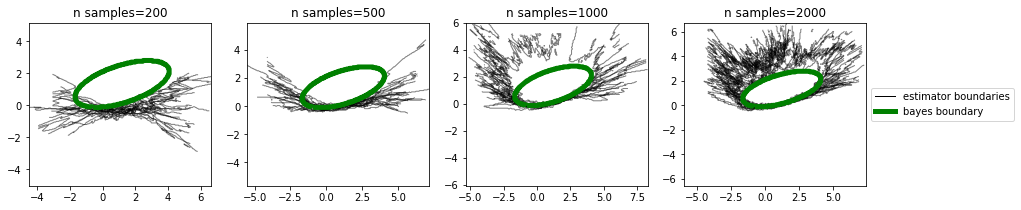

In [8]:
for mc in [mc1, mc2, mc3]:
    sample_borders(mc, KNeighborsClassifier(100), samples = [200,500,1000, 2000], n_reps=20)

100% (4 of 4) |###########################| Elapsed Time: 0:02:18 Time: 0:02:18


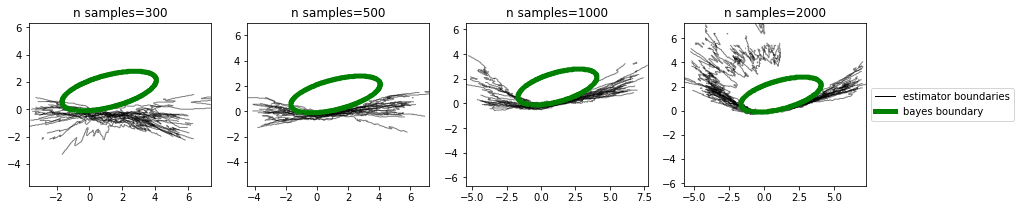

In [9]:
sample_borders(mc3, KNeighborsClassifier(200), samples = [300,500,1000,2000], n_reps=20)

## Exploring classification frontiers from SVMs

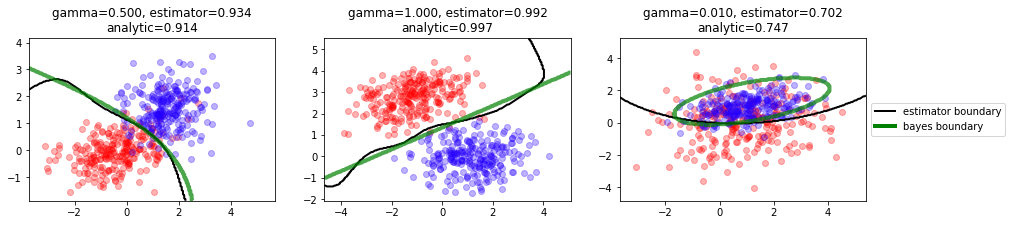

In [11]:
estimators = {"gamma=%.3f"%i: SVC(gamma=i) for i in [.01,.1,.5,1]}
    
plt.figure(figsize=(15,3))
for i,mc in enumerate([mc1, mc2, mc3]):
    plt.subplot(1,3,i+1)
    plot_estimator_border(mc, estimators.values()[i], estimator_name=estimators.keys()[i], n_samples=500, legend=i==2)    

100% (4 of 4) |###########################| Elapsed Time: 0:01:13 Time: 0:01:13


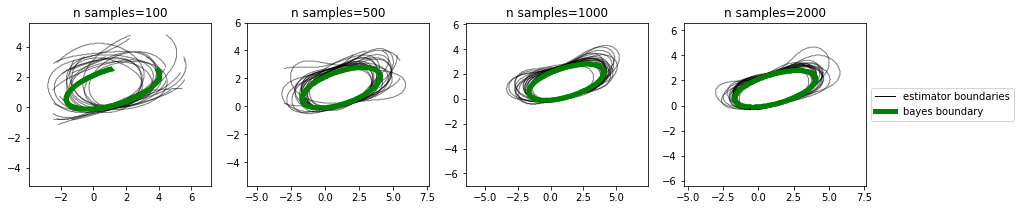

In [12]:
sample_borders(mc3, SVC(gamma=.1), samples = [100,500,1000,2000], n_reps=20)